In [1]:
import pandas as pd
import sklearn as sk
import scipy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('../dataFiles/ExoPlanetTrain.csv',index_col=0)

In [6]:
df.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
LABEL,,,,,,,,,,,,,,,,,,,,,
2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,-160.17,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,-73.38,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,484.39,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,323.33,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,-970.88,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [11]:
labels = df.index
labels

Int64Index([2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
            ...
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
           dtype='int64', name='LABEL', length=5087)

## Assign the mean/median/std/max/min/skew of the entire dataset and graph each of them

In [16]:
means = df.mean(axis=1)
medians = df.median(axis=1)
std = df.std(axis=1)
maxval = df.max(axis=1)
minval = df.min(axis=1)
skew = df.skew(axis=1)

Text(0, 0.5, 'Num. of Stars')

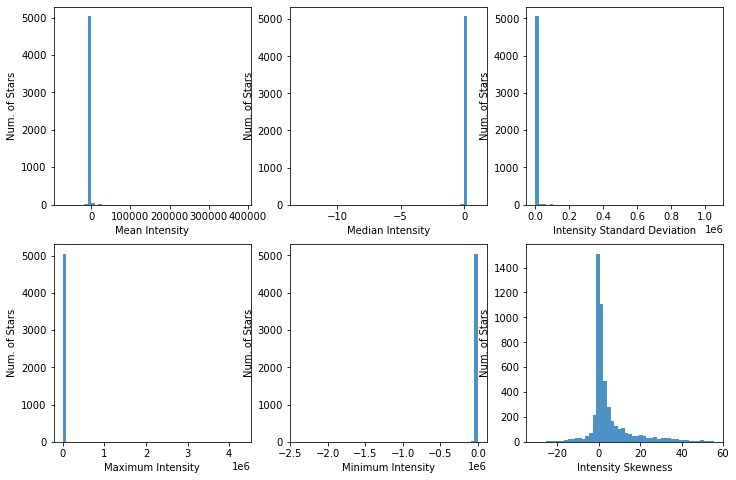

In [19]:
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(231)
ax.hist(means,alpha=0.8,bins=50)
ax.set_xlabel('Mean Intensity')
ax.set_ylabel('Num. of Stars')

ax = fig.add_subplot(232)
ax.hist(medians,alpha=0.8,bins=50)
ax.set_xlabel('Median Intensity')
ax.set_ylabel('Num. of Stars')
    
ax = fig.add_subplot(233)
ax.hist(std,alpha=0.8,bins=50)
ax.set_xlabel('Intensity Standard Deviation')
ax.set_ylabel('Num. of Stars')
    
ax = fig.add_subplot(234)
ax.hist(maxval,alpha=0.8,bins=50)
ax.set_xlabel('Maximum Intensity')
ax.set_ylabel('Num. of Stars')
    
ax = fig.add_subplot(235)
ax.hist(minval,alpha=0.8,bins=50)
ax.set_xlabel('Minimum Intensity')
ax.set_ylabel('Num. of Stars')
    
ax = fig.add_subplot(236)
ax.hist(skew,alpha=0.8,bins=50)
ax.set_xlabel('Intensity Skewness')
ax.set_ylabel('Num. of Stars')

## Assign the mean/median/std/max/min/skew of Exoplanets to a variable and of Non-exoplanets to another variable and then graph them on the same charts

In [21]:
means1 = df[labels==1].mean(axis=1)
medians1 = df[labels==1].median(axis=1)
std1 = df[labels==1].std(axis=1)
maxval1 = df[labels==1].max(axis=1)
minval1 = df[labels==1].min(axis=1)
skew1 = df[labels==1].skew(axis=1)

means2 = df[labels==2].mean(axis=1)
medians2 = df[labels==2].median(axis=1)
std2 = df[labels==2].std(axis=1)
maxval2 = df[labels==2].max(axis=1)
minval2 = df[labels==2].min(axis=1)
skew2 = df[labels==2].skew(axis=1)

Text(0, 0.5, 'Num. of Stars')

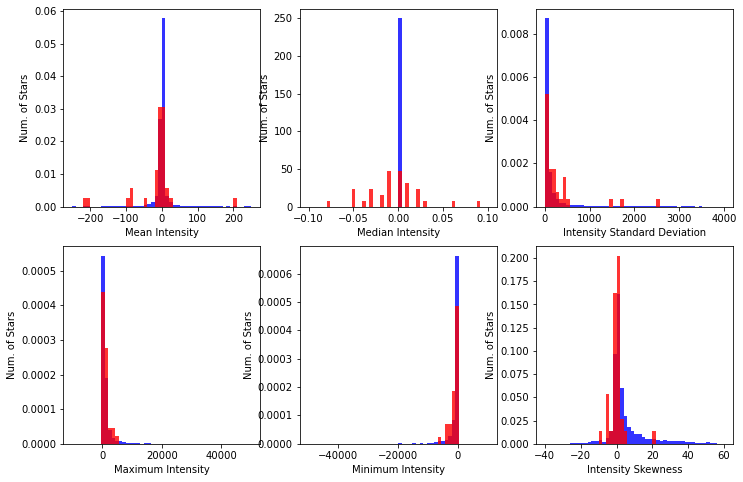

In [25]:
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(231)
ax.hist(means1,alpha=0.8,bins=50,color='b',density=True,range=(-250,250))
ax.hist(means2,alpha=0.8,bins=50,color='r',density=True,range=(-250,250))
ax.get_legend()
ax.set_xlabel('Mean Intensity')
ax.set_ylabel('Num. of Stars')

ax = fig.add_subplot(232)
ax.hist(medians1,alpha=0.8,bins=50,color='b',density=True,range=(-0.1,0.1))
ax.hist(medians2,alpha=0.8,bins=50,color='r',density=True,range=(-0.1,0.1))
ax.get_legend()
ax.set_xlabel('Median Intensity')
ax.set_ylabel('Num. of Stars')

ax = fig.add_subplot(233)    
ax.hist(std1,alpha=0.8,bins=50,density=True,color='b',range=(0,4000))
ax.hist(std2,alpha=0.8,bins=50,density=True,color='r',range=(0,4000))
ax.get_legend()
ax.set_xlabel('Intensity Standard Deviation')
ax.set_ylabel('Num. of Stars')

ax = fig.add_subplot(234)
ax.hist(maxval1,alpha=0.8,bins=50,density=True,color='b',range=(-10000,50000))
ax.hist(maxval2,alpha=0.8,bins=50,density=True,color='r',range=(-10000,50000))
ax.get_legend()
ax.set_xlabel('Maximum Intensity')
ax.set_ylabel('Num. of Stars')

ax = fig.add_subplot(235)
ax.hist(minval1,alpha=0.8,bins=50,density=True,color='b',range=(-50000,10000))
ax.hist(minval2,alpha=0.8,bins=50,density=True,color='r',range=(-50000,10000))
ax.get_legend()
ax.set_xlabel('Minimum Intensity')
ax.set_ylabel('Num. of Stars')

ax = fig.add_subplot(236)
ax.hist(skew1,alpha=0.8,bins=50,density=True,color='b',range=(-40,60))
ax.hist(skew2,alpha=0.8,bins=50,density=True,color='r',range=(-40,60)) 
ax.get_legend()
ax.set_xlabel('Intensity Skewness')
ax.set_ylabel('Num. of Stars')

In [26]:
df[labels==1].median(axis=1).describe()

count    5050.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
dtype: float64

## Visualization of the first 37 Exoplanet stars

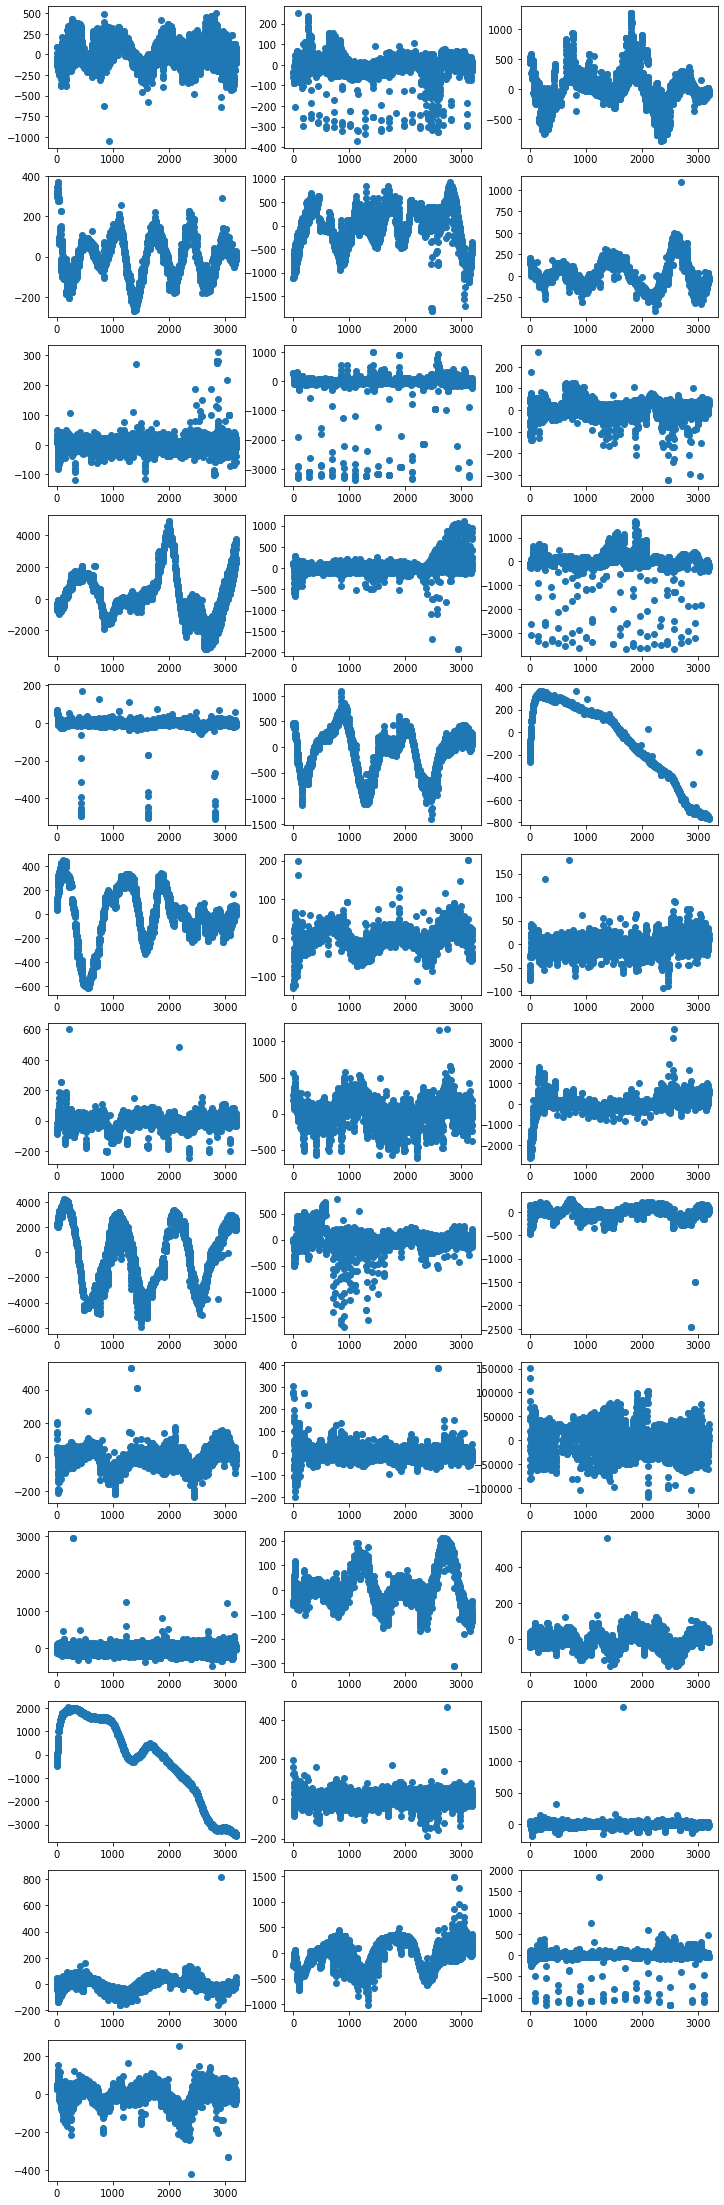

In [27]:
fig = plt.figure(figsize=(12,40))
x = np.array(range(3197))
for i in range(37):
    ax = fig.add_subplot(13,3,i+1)
    ax.scatter(x,df[labels==2].iloc[i,:])

## Visualization of the first 37 Non-exoplanet stars

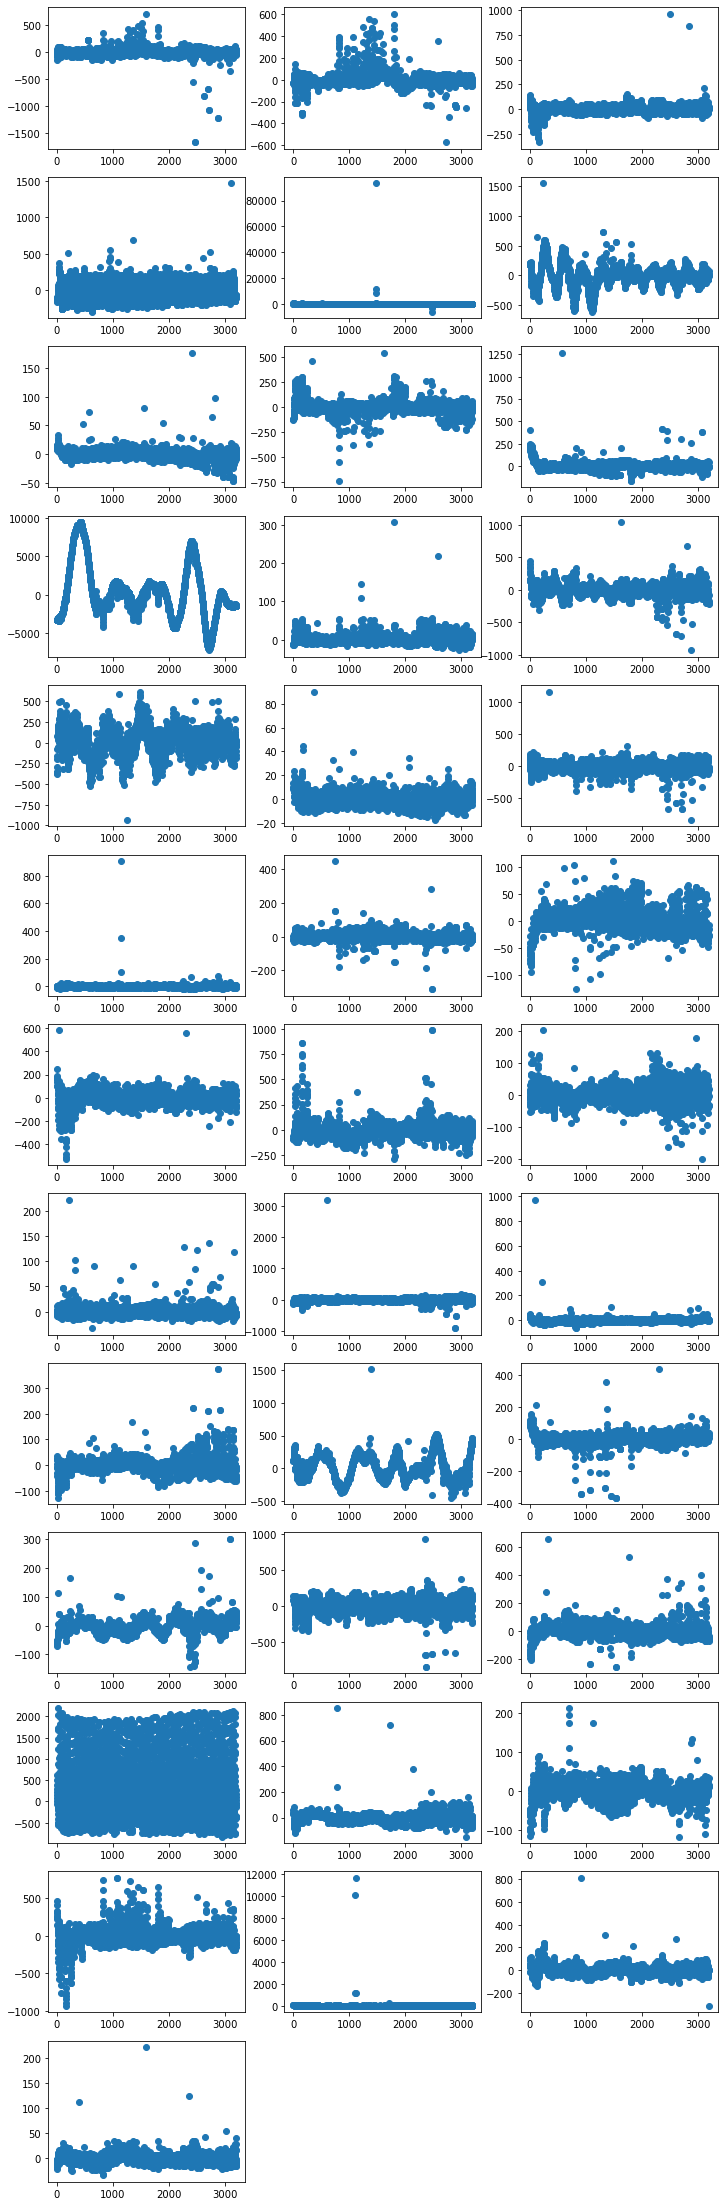

In [28]:
fig = plt.figure(figsize=(12,40))
x = np.array(range(3197))
for i in range(37):
    ax = fig.add_subplot(13,3,i+1)
    ax.scatter(x,df[labels==1].iloc[i,:])

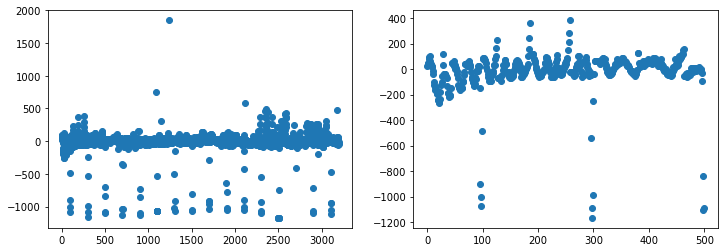

In [29]:
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(121)
plt.scatter(x,df[labels==2].iloc[35,:])
ax = fig.add_subplot(122)
plt.scatter(np.array(range(500)),df[labels==2].iloc[35,:500])
plt.show()

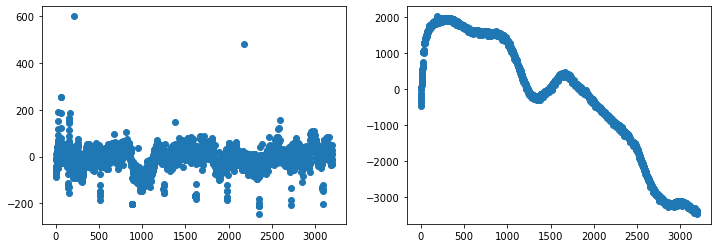

In [30]:
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(121)
plt.scatter(x,df[labels==2].iloc[18,:])
ax = fig.add_subplot(122)
plt.scatter(x,df[labels==2].iloc[30,:])
plt.show()

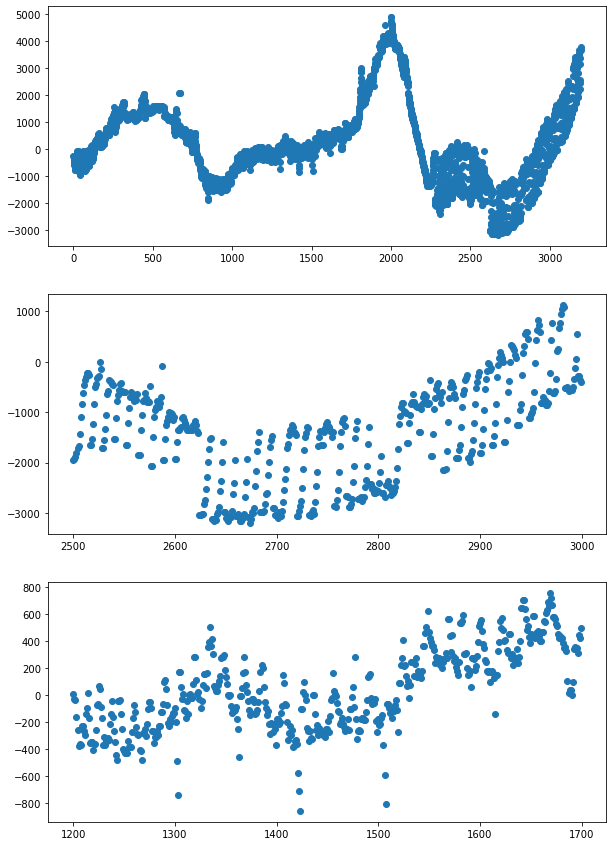

In [31]:
fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(311)
ax.scatter(x,df[labels==2].iloc[9,:])
ax = fig.add_subplot(312)
ax.scatter(np.array(range(2500,3000)),df[labels==2].iloc[9,2500:3000])
ax = fig.add_subplot(313)
ax.scatter(np.array(range(1200,1700)),df[labels==2].iloc[9,1200:1700])
plt.show()